### Personal Loan Campaign Project


### Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.
Project Dataset: Loan_Modelling.csv

Data Dictionary:
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the data
data = pd.read_csv("Loan_Modelling.csv")
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# check the basic information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- Based on the above, it can be noticed that there are no missing values within the dataset**

In [7]:
# check the unique values of all columns
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in ID: [   1    2    3 ... 4998 4999 5000]
Unique values in Age: [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
Unique values in Experience: [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
Unique values in Income: [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 

- Based on the above, it could be identified that 6 columns have unique values, this would be explore in the latter part of the project, there might be need to pefrom One-Hot Encoding for the Education column

In [9]:
# check the measure of description of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


- The above shows the following:
    - The average age of people in the dataset are around 45 years old.
    - The average family size of the dataset is 2
    - Most of the people don't have any form of Loan (Mortgage, Personal Loan etc)
    - Most of the people in the dataset are professionals.**

### Exploratory Analysis of the Features and Target variable

In [44]:
data_copy.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard', 'Undergrad', 'Graduate',
       'Advanced/Professional'],
      dtype='object')

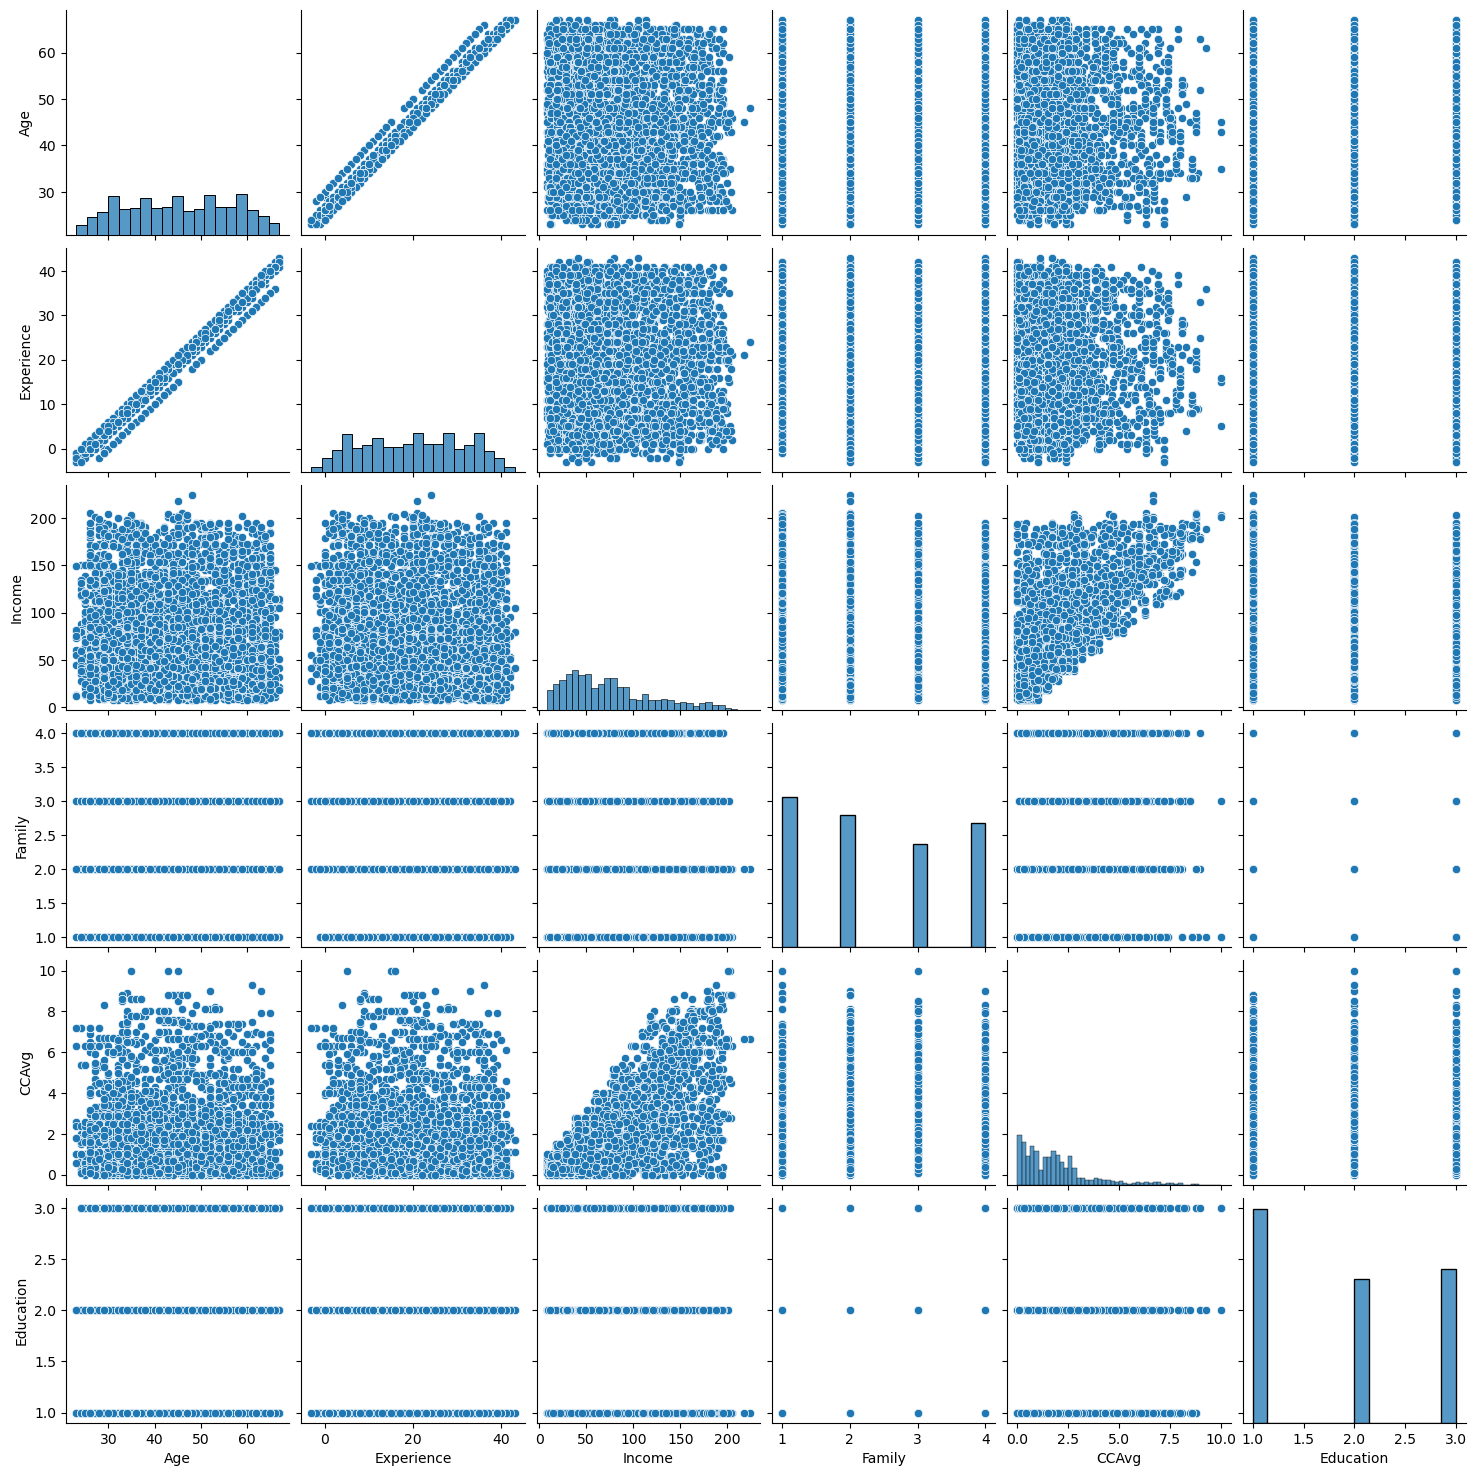

In [49]:
# Determine the columns to be visualized
columns_to_plot = ['Age', 'Experience', 'Income', 'Family', 'CCAvg','Education']

# Plot univariate charts in a single diagram
sns.pairplot(data[columns_to_plot])

plt.show()

- The above showed the relationship that exists between some of the features, it can also be noticed that just two of the features are normally distributed, there would be no need to normalize all columns, since we would be using a tree-based model. 
- The two variables that are correlated within the dataset are: "Age" & "Experience", which is logical since the Age of an individual might actually determine the number of years the individual has in a professional setting.

In [12]:
# create a copy of the data before data transformation
data_copy = data.copy()
data_copy.sample(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
550,551,60,34,54,94301,3,0.3,2,0,0,0,0,1,1
416,417,40,15,85,94304,2,0.4,1,0,0,0,0,1,0
1693,1694,57,31,43,95616,1,0.2,1,0,0,0,0,0,0
4350,4351,64,39,101,95134,4,3.4,2,0,0,0,0,0,1
1059,1060,28,2,11,91203,1,0.1,2,0,0,0,0,1,1


### One-Hot Encoding

In [13]:
#Encode the Education columns
data_copy = pd.get_dummies(data_copy, columns=['Education'])

In [14]:
data_copy.sample(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_1,Education_2,Education_3
1763,1764,48,24,134,94105,1,5.0,0,0,0,0,0,1,1,0,0
3850,3851,48,23,15,94061,4,0.8,0,0,0,0,1,0,1,0,0
2519,2520,60,36,10,92121,2,1.0,0,0,0,0,1,1,1,0,0
3428,3429,45,21,24,93106,1,0.9,0,0,0,0,0,0,0,0,1
2973,2974,47,22,82,92084,1,2.9,276,0,0,0,1,0,1,0,0


In [15]:
# rephrase the name of  the newly created columns after One-Hot Encoding
new_column_names = {'Education_1': 'Undergrad','Education_2': 'Graduate','Education_3': 'Advanced/Professional'}

data_copy.rename(columns=new_column_names, inplace=True)

In [16]:
# view the dataset
data_copy.sample(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Undergrad,Graduate,Advanced/Professional
3694,3695,38,8,21,92037,1,0.67,0,0,0,0,1,0,0,0,1
2279,2280,47,23,34,91711,4,0.60,0,0,0,1,1,1,1,0,0
2900,2901,52,28,55,91320,2,3.20,151,0,0,0,0,0,0,0,1
1717,1718,33,7,101,93727,1,2.70,233,0,0,0,0,0,0,1,0
2864,2865,65,41,84,95762,2,0.00,0,0,0,0,1,1,0,0,1


### Splitting  the Data

In [25]:
# Split features and target variable
X = data_copy.drop(columns=['ID', 'Personal_Loan', 'ZIPCode'])
y = data_copy['Personal_Loan']

In [51]:
# Determine the frequency distributiion within the target variable

freq_distribution = y.value_counts(normalize=True)*100
print(freq_distribution)

0    90.4
1     9.6
Name: Personal_Loan, dtype: float64


- The above shows that over 90% of the dataset don't have personal loans

In [53]:
# Split the data into training (80%) and testing sets(20%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18, stratify=y)

In [54]:
X_train.shape

(4000, 13)

In [55]:
X_test.shape

(1000, 13)

### Model Evaluation with Random Forest Classifier

In [56]:
#import the neccesary library
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [57]:
# Initialize the model
rf_model = RandomForestClassifier(random_state=18)

In [58]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=18)

In [59]:
# Get feature importances
feature_importances = rf_model.feature_importances_

In [60]:
#Create a DataFrame to display feature importances
feature_importance_data = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_data = feature_importance_data.sort_values(by='Importance', ascending=False)
print(feature_importance_data)

                  Feature  Importance
2                  Income    0.318437
4                   CCAvg    0.171161
3                  Family    0.115872
10              Undergrad    0.109864
12  Advanced/Professional    0.051945
11               Graduate    0.050082
7              CD_Account    0.044976
5                Mortgage    0.043642
0                     Age    0.037880
1              Experience    0.037292
9              CreditCard    0.007102
8                  Online    0.006982
6      Securities_Account    0.004765


- The above shows that the "Income" column is of the highest importance to the model, while the "Securities_Account" has the lowest impact in the model

In [61]:
# Predictions on the test set
y_pred = rf_model.predict(X_test)

In [62]:
# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       904
           1       0.99      0.92      0.95        96

    accuracy                           0.99      1000
   macro avg       0.99      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000



In [66]:
# print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[903   1]
 [  8  88]]


### Insights to the Model Evaluation

- The model achieves high accuracy (99%) overall.
- It exhibits excellent precision, recall, and F1-score for class 0.
- For class 1, precision remains high, but recall is slightly lower, suggesting the model may miss some instances.
- The confusion matrix:
   True negatives (TN): 903 instances were correctly predicted as class 0.
   False positives (FP): 1 instances were incorrectly predicted as class 1.
   False negatives (FN): 8 instances were incorrectly predicted as class 0.
   True positives (TP): 88 instances were correctly predicted as class 1.

### Objectives of the Project

**1. To predict whether a liability customer will buy a personal loan or not.**
  

- based on the above confusion matrix, it can be noted that out of 1000 instances, 903  people would not be getting a personal loan while 88 people would be getting personal loans

**2. Which variables are most significant.**

In [65]:
print(feature_importance_data)

                  Feature  Importance
2                  Income    0.318437
4                   CCAvg    0.171161
3                  Family    0.115872
10              Undergrad    0.109864
12  Advanced/Professional    0.051945
11               Graduate    0.050082
7              CD_Account    0.044976
5                Mortgage    0.043642
0                     Age    0.037880
1              Experience    0.037292
9              CreditCard    0.007102
8                  Online    0.006982
6      Securities_Account    0.004765


- The above shows the breakdown of variables on a scale of importance with Income being the highest and Securities_Account as the lowest

**3. Which segment of customers should be targeted more.**

- The 88 people under the True Positive section should be targeted